## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

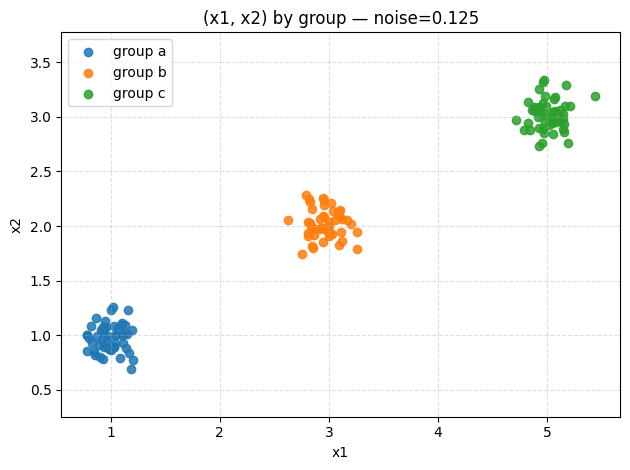

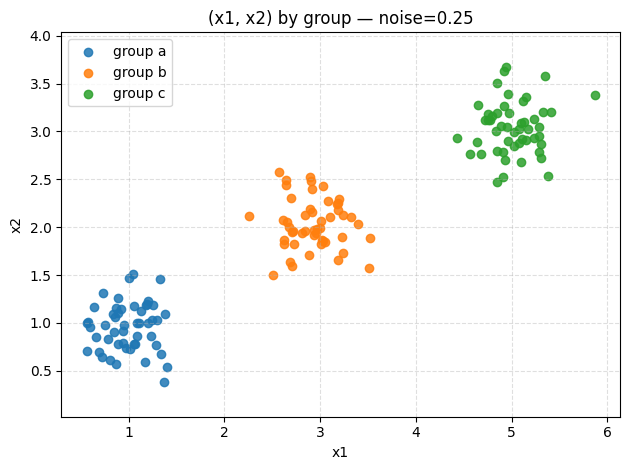

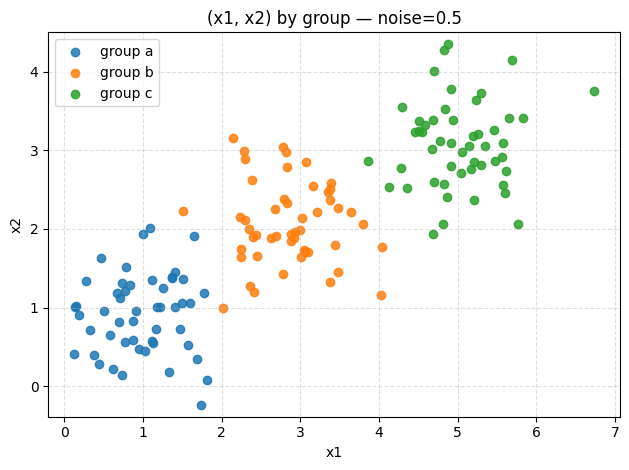

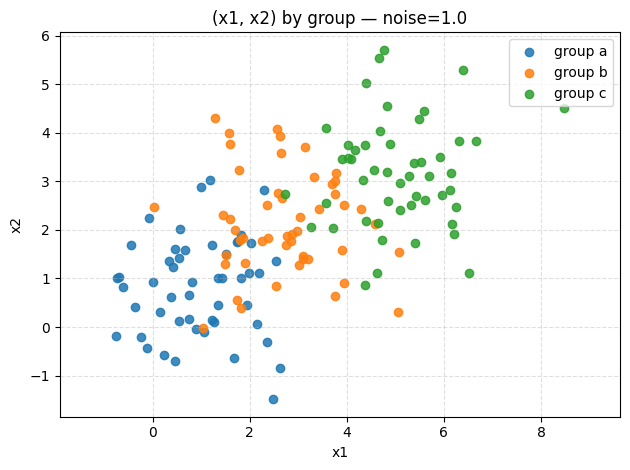

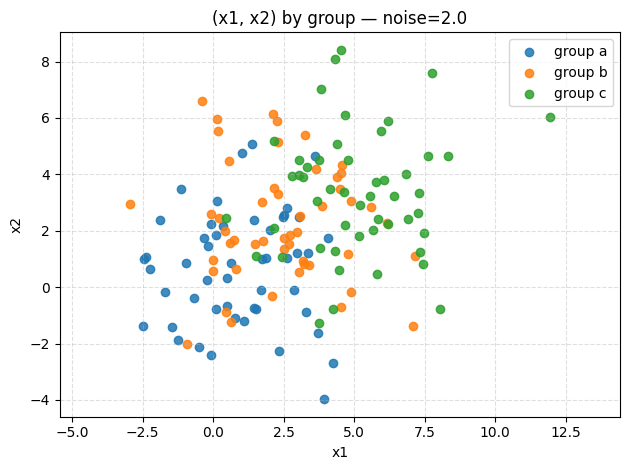

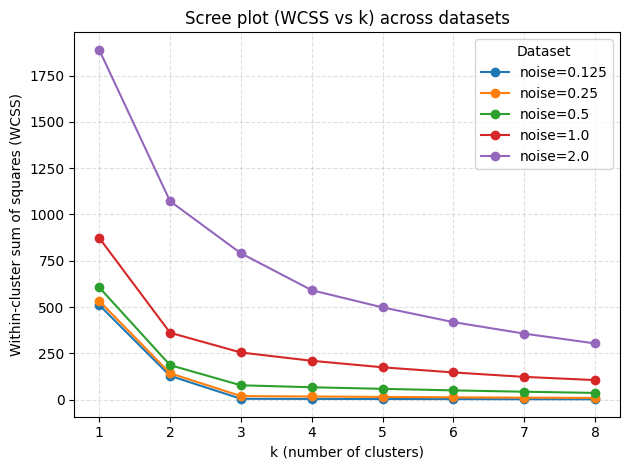

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#1
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

#2
datasets = {
    "noise=0.125": df0_125,
    "noise=0.25":  df0_25,
    "noise=0.5":   df0_5,
    "noise=1.0":   df1_0,
    "noise=2.0":   df2_0,
}

for name, df in datasets.items():
    plt.figure()
    for g, gdf in df.groupby("group"):
        plt.scatter(gdf["x1"], gdf["x2"], label=f"group {g}", alpha=0.85)
    plt.title(f"(x1, x2) by group — {name}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("equal")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.show()

#3
def wcss_for_dataset(df, k_values):
    X = df[["x1", "x2"]].to_numpy()
    wcss = []
    for k in k_values:
        km = KMeans(n_clusters=k, n_init=20, random_state=100)
        km.fit(X)
        wcss.append(km.inertia_)
    return wcss

k_values = list(range(1, 9))
wcss_dict = {name: wcss_for_dataset(df, k_values) for name, df in datasets.items()}

plt.figure()
for name, wcss in wcss_dict.items():
    plt.plot(k_values, wcss, marker="o", label=name)
plt.title("Scree plot (WCSS vs k) across datasets")
plt.xlabel("k (number of clusters)")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.xticks(k_values)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

1. Code above
2. As the noise increases from 0.125 to 2.0, the three clusters go from looking tight and clearly separated to increasingly wide, overlapping blobs, until at high noise they blend into a single diffuse cloud with only faint hints of structure.
3. In the scree plots, higher noise pushes the WCSS curves upward and smooths them out: at low noise there is a sharp elbow at k=3, at moderate noise the elbow is softer but still visible, and at high noise the curve lacks a clear elbow, making it difficult to choose a single k with confidence based on WCSS alone.
4. The elbow occurs because, up to the true number of clusters, adding clusters captures real structure and sharply reduces within-cluster variance, but beyond that point additional clusters mostly split existing groups and chase random noise, producing only small incremental improvements and thus a bend where the gains begin to diminish.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

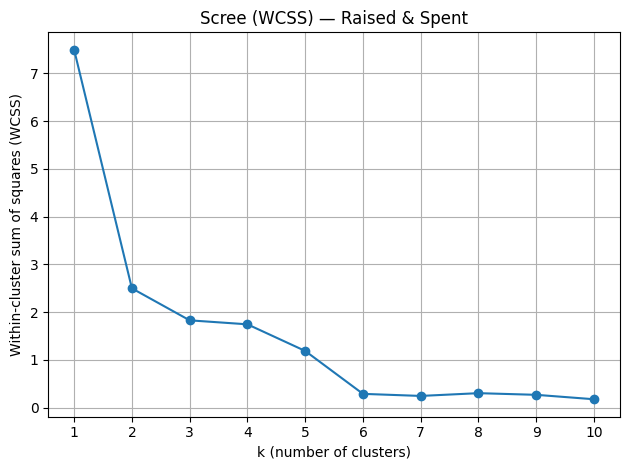

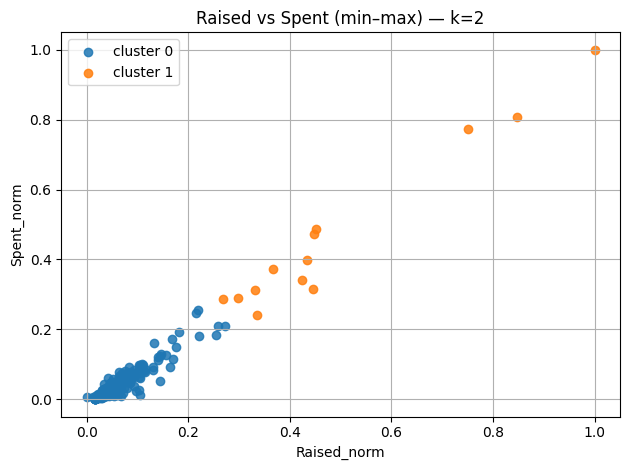

Cluster sizes (Raised/Spent):
            count
cluster_RS       
1              13
0             524
Members of the two smallest clusters:
                    Member       Party                State Chamber  Raised_clean  Spent_clean  cluster_RS
                 Rand Paul  Republican             Kentucky  Senate      22490627     15865010           0
              Katie Porter  Democratic           California   House      21441693     15946876           0
               Adam Schiff  Democratic           California   House      20993041     13957854           0
            Michael Bennet  Democratic             Colorado  Senate      18086343     13713611           0
             Steve Scalise  Republican            Louisiana   House      17940130     19428130           0
                  Ted Cruz  Republican                Texas  Senate      17471712     18818227           0
              Dan Crenshaw  Republican                Texas   House      14535870     14512435           0
    

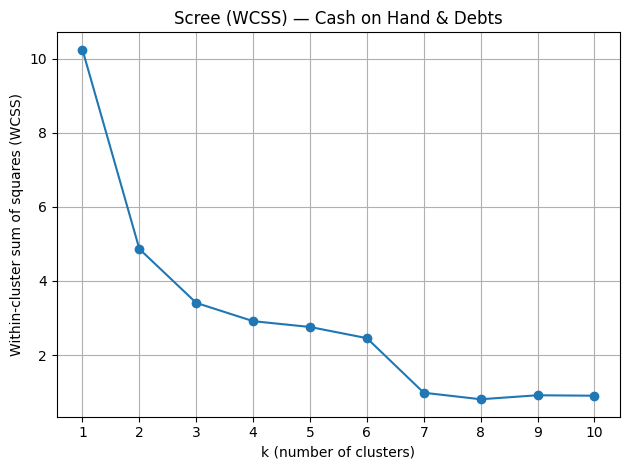

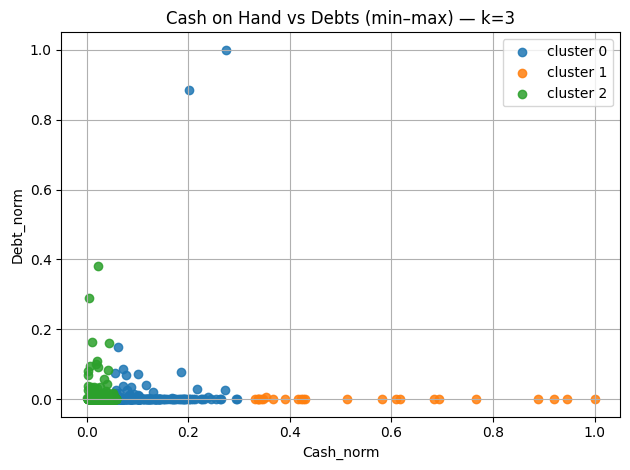

Cluster sizes (Cash/Debt):
            count
cluster_CD       
1              24
0             186
2             327

Members of the two smallest clusters (Cash/Debt):
                  Member      Party         State Chamber  Cash on Hand_clean  Debts_clean  cluster_CD
            Nancy Pelosi Democratic    California   House             6701313            0           0
             Val Demings Democratic       Florida   House             6647641            0           0
             David Trone Democratic      Maryland   House             6206371     13302000           0
             Jerry Moran Republican        Kansas  Senate             6134163       333216           0
               Ron Wyden Democratic        Oregon  Senate             5986323            0           0
Alexandria Ocasio-Cortez Democratic      New York   House             5940454            0           0
        Chrissy Houlahan Democratic  Pennsylvania   House             5763037            0           0
        

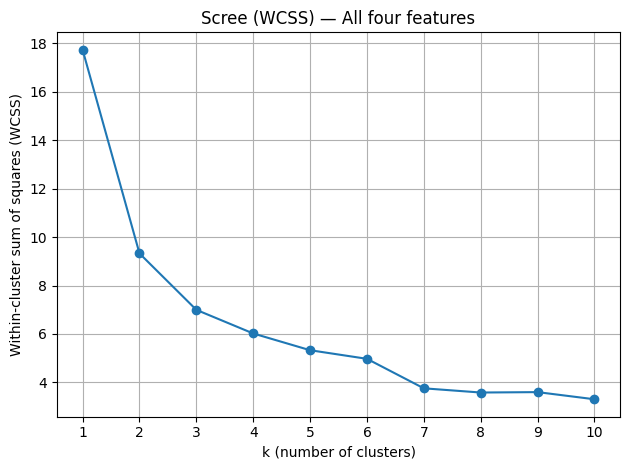

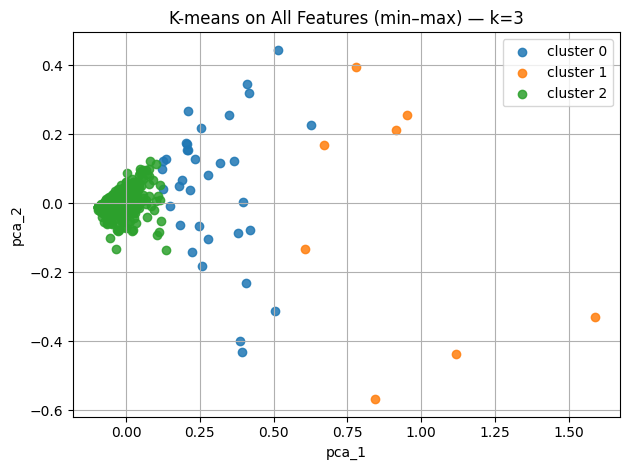

Cluster sizes (All features):
             count
cluster_ALL       
1                8
0               35
2              494

Cluster medians (All features):
             Raised_clean  Spent_clean  Cash on Hand_clean  Debts_clean
cluster_ALL                                                            
0                11253771      6932873             6701313            0
1                37226270     28048730            17880644            0
2                 1585728      1149857              893259            0


In [13]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

path = "./data/2022 election cycle fundraising.csv"
df = pd.read_csv(path, encoding="utf-8", low_memory=False)
MONEY_COLS = ["Raised", "Spent", "Cash on Hand", "Debts"]

def clean_money_series(s: pd.Series) -> pd.Series:
    ser = s.astype(str).str.strip()
    neg = ser.str.match(r'^\(.*\)$', na=False)
    ser = ser.str.replace(r'[\$,]', '', regex=True).str.replace(r'[\(\)]', '', regex=True)
    ser = ser.replace({'': np.nan, '-': np.nan, '—': np.nan, 'None': np.nan, 'nan': np.nan})
    out = pd.to_numeric(ser, errors='coerce')
    out[neg] = -out[neg]
    return out

for c in MONEY_COLS:
    df[c + "_clean"] = clean_money_series(df[c])

#2
def wcss_over_k(X, k_range=range(1, 11), fast=True, random_state=123):
    w = []
    for k in k_range:
        if fast:
            km = MiniBatchKMeans(n_clusters=k, n_init=5, max_iter=100,
                                 batch_size=2048, random_state=random_state)
        else:
            km = KMeans(n_clusters=k, n_init=20, random_state=random_state)
        km.fit(X)
        w.append(km.inertia_)
    return np.array(w, dtype=float)

def elbow_kneedle(wcss, k_range):
    x = np.array(list(k_range), dtype=float)
    y = np.array(wcss, dtype=float)
    x0, y0 = x[0], y[0]; x1, y1 = x[-1], y[-1]
    den = np.hypot(x1-x0, y1-y0)
    if den == 0: 
        return int(x[0])
    d = np.abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0) / den
    # avoid endpoints
    idx = np.argmax(d[1:-1]) + 1 if len(x) > 2 else 0
    return int(x[idx])

def plot_scree(wcss, k_range, title):
    plt.figure()
    plt.plot(list(k_range), wcss, marker='o')
    plt.title(title)
    plt.xlabel("k (number of clusters)")
    plt.ylabel("Within-cluster sum of squares (WCSS)")
    plt.xticks(list(k_range))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_clusters(df_xy, xcol, ycol, labels, k, title):
    plt.figure()
    labs = np.asarray(labels)
    for g in np.unique(labs):
        m = labs == g
        plt.scatter(df_xy.loc[m, xcol], df_xy.loc[m, ycol], label=f"cluster {g}", alpha=0.85)
    plt.title(f"{title} — k={k}")
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.grid(True); plt.legend(); plt.tight_layout()
    plt.show()

rs_df = df[["Member","Party","State","Chamber","Raised_clean","Spent_clean"]].dropna(subset=["Raised_clean","Spent_clean"]).copy()

scaler_rs = MinMaxScaler()
rs_df[["Raised_norm","Spent_norm"]] = scaler_rs.fit_transform(rs_df[["Raised_clean","Spent_clean"]])

k_range = range(1, 11)
X_rs = rs_df[["Raised_norm","Spent_norm"]].to_numpy()
wcss_rs = wcss_over_k(X_rs, k_range=k_range, fast=True)
k_rs = elbow_kneedle(wcss_rs, k_range)
plot_scree(wcss_rs, k_range, "Scree (WCSS) — Raised & Spent")

km_rs = MiniBatchKMeans(n_clusters=k_rs, n_init=10, max_iter=200, batch_size=2048, random_state=123)
rs_df["cluster_RS"] = km_rs.fit_predict(X_rs)
plot_clusters(rs_df, "Raised_norm", "Spent_norm", rs_df["cluster_RS"], k_rs, "Raised vs Spent (min–max)")

sizes_rs = rs_df["cluster_RS"].value_counts().sort_values(ascending=True)
smallest_two_rs = list(sizes_rs.index[:2])

small_rs = (
    rs_df[rs_df["cluster_RS"].isin(smallest_two_rs)]
      .sort_values(["cluster_RS","Raised_clean"], ascending=[True, False])
      [["Member","Party","State","Chamber","Raised_clean","Spent_clean","cluster_RS"]]
)
print("Cluster sizes (Raised/Spent):")
print(sizes_rs.to_frame("count"))
print("Members of the two smallest clusters:")
print(small_rs.to_string(index=False))

#3
cd_df = df[["Member","Party","State","Chamber","Cash on Hand_clean","Debts_clean"]].dropna(subset=["Cash on Hand_clean","Debts_clean"]).copy()

scaler_cd = MinMaxScaler()
cd_df[["Cash_norm","Debt_norm"]] = scaler_cd.fit_transform(cd_df[["Cash on Hand_clean","Debts_clean"]])

k_range = range(1, 11)
X_cd = cd_df[["Cash_norm","Debt_norm"]].to_numpy()
wcss_cd = wcss_over_k(X_cd, k_range=k_range, fast=True)
k_cd = elbow_kneedle(wcss_cd, k_range)
plot_scree(wcss_cd, k_range, "Scree (WCSS) — Cash on Hand & Debts")

km_cd = MiniBatchKMeans(n_clusters=k_cd, n_init=10, max_iter=200, batch_size=2048, random_state=123)
cd_df["cluster_CD"] = km_cd.fit_predict(X_cd)
plot_clusters(cd_df, "Cash_norm", "Debt_norm", cd_df["cluster_CD"], k_cd, "Cash on Hand vs Debts (min–max)")

sizes_cd = cd_df["cluster_CD"].value_counts().sort_values(ascending=True)
smallest_two_cd = list(sizes_cd.index[:2])
small_cd = (
    cd_df[cd_df["cluster_CD"].isin(smallest_two_cd)]
      .sort_values(["cluster_CD","Cash on Hand_clean"], ascending=[True, False])
      [["Member","Party","State","Chamber","Cash on Hand_clean","Debts_clean","cluster_CD"]]
)
print("Cluster sizes (Cash/Debt):")
print(sizes_cd.to_frame("count"))
print("\nMembers of the two smallest clusters (Cash/Debt):")
print(small_cd.head(50).to_string(index=False))

#4
all_df = df[[
    "Member","Party","State","Chamber",
    "Raised_clean","Spent_clean","Cash on Hand_clean","Debts_clean"
]].dropna().copy()

scaler_all = MinMaxScaler()
all_df[["Raised_n","Spent_n","Cash_n","Debt_n"]] = scaler_all.fit_transform(
    all_df[["Raised_clean","Spent_clean","Cash on Hand_clean","Debts_clean"]]
)

k_range = range(1, 11)
X_all = all_df[["Raised_n","Spent_n","Cash_n","Debt_n"]].to_numpy()
wcss_all = wcss_over_k(X_all, k_range=k_range, fast=True)
k_all = elbow_kneedle(wcss_all, k_range)
plot_scree(wcss_all, k_range, "Scree (WCSS) — All four features")

km_all = MiniBatchKMeans(n_clusters=k_all, n_init=10, max_iter=200, batch_size=2048, random_state=123)
all_df["cluster_ALL"] = km_all.fit_predict(X_all)
plot_clusters(
    all_df.assign(pca_1=PCA(n_components=2).fit_transform(X_all)[:,0],
                  pca_2=PCA(n_components=2).fit_transform(X_all)[:,1]),
    "pca_1", "pca_2", all_df["cluster_ALL"], k_all, "K-means on All Features (min–max)"
)

print("Cluster sizes (All features):")
print(all_df["cluster_ALL"].value_counts().sort_values(ascending=True).to_frame("count"))

summary_all = (
    all_df.groupby("cluster_ALL")[["Raised_clean","Spent_clean","Cash on Hand_clean","Debts_clean"]]
          .median()
          .sort_index()
)
print("\nCluster medians (All features):")
print(summary_all.round(0).astype(int).to_string())




1. I cleaned the variables by converting strings like '$1,234', '(5,000)', '-', '—' to numeric values. I also converted parentheses -> negative. Non-numeric -> NaN values.
2. The code above prints all the politicians in the two smallest clusters for Raised/Spent. They are both high-dollar outliers.
3. The code above prints all the politicians in the two smallest clusters for Cash/Debt.
4. Using all four variables, the scree plot shows a clear elbow at k = 3, so three clusters are appropriate. Compared with Raised–Spent, the same two outlier tiers persist, but now we see they also finish with high cash and essentially no debt. Compared with Cash–Debt, adding Raised and Spent prevents high balance-sheet but mid-scale campaigns from being mixed with the true mega-campaigns.
5. Yes, k-means surfaced three intuitive tiers: a tiny elite of national, high-throughput campaigns with big cash cushions and no debt; a smaller next tier of well-funded operations; and a broad mass of typical campaigns with modest funds and meaningful debt. This is useful as it lets you see competitive races, spotting fundraising efficiency and also prioritizing where additional dollars or field resources might have the largest marginal impact.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?